![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import seaborn as sns

# import module pandas and seaborn to using

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

# read_csv function of pandas can get all data of file 

**Check the head of the DataFrame.**

In [0]:
sal.head()
# head function of pandas can get first n(default = 5) first line of data

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [0]:
sal.info()

# info function can get info of data like name, length, type of column, memory of data using, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [0]:
BasePay = sal['BasePay'] 
# assign data of column BasePay to variable BasePay for more conveneint

BasePay.mean()
# mean function calculate average of column have type number like int, float, ...

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [0]:
BasePay.min()
# min function get min value of column

-166.01

In [0]:
BasePay.max()
# min function get max value of column

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [0]:

OvertimePay = sal['OvertimePay']
OvertimePay.mean(), OvertimePay.min(), OvertimePay.max()
# using mean, min and max function to get result

(5066.059886444622, -0.01, 245131.88)

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [0]:
sal['JobTitle'][sal['EmployeeName']=='JOSEPH DRISCOLL']
# get column JobTitle with condition EmployeeName of that people must equal to JOSEPH DRISCOLL

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [0]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName']=='GARY JIMENEZ']
# get all column with condition EmployeeName of that people must equal to GARY JIMENEZ

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [0]:
sal['TotalPayBenefits'][sal['EmployeeName']=='JOSEPH DRISCOLL']
# get column TotalPayBenefits with condition EmployeeName of that people must equal to JOSEPH DRISCOLL

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [0]:
sal['EmployeeName'][sal['TotalPayBenefits']==sal['TotalPayBenefits'].max()]
# get column Employee with condition TotalPayBenefits of that people must equal to max value of this column

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [0]:
sal['EmployeeName'][sal['TotalPayBenefits']==sal['TotalPayBenefits'].min()]
# get EmployeeName column with condition TotalPayBenefits of that people must equal to min value of this column
# whao he has minus payment!!!!

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [0]:
BasePay.groupby(sal['Year']).mean()
# get group follow year and calculate the average by using group 'Year' column and using mean function

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [0]:
sal['JobTitle'].nunique()
# nuinque function can get number of unique value of column

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [0]:
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [0]:
(sal[sal['Year']==2013]['JobTitle'].value_counts()==1).sum()

202

**How many people have the word Chief in their job title?**

In [0]:
sal['JobTitle'].apply(lambda str:('chief' in str.lower())).sum()

627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

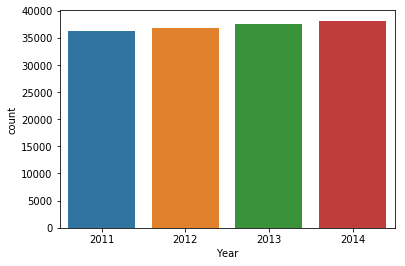

In [0]:
sns.countplot(x='Year', data=sal)
# using function countplot of seaborn passing column and data to visualize

**Implement seaborn's distplot for BasePay of Year 2011**

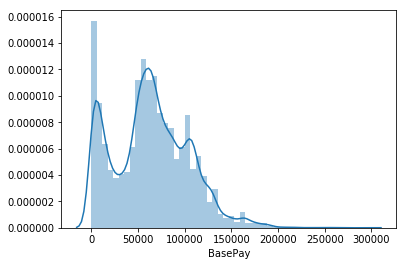

In [0]:
sns.distplot(sal['BasePay'][sal['Year']==2011])
# using function distplot of seaborn passing column of data to visualize
# column must be number data not null or NaN any element

**How about other Year**

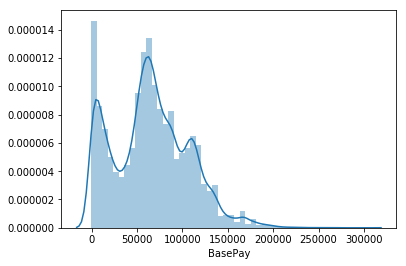

In [0]:
sns.distplot(sal['BasePay'][sal['Year']==2012])
# 2011 and 2014 can't visualize because can't convert float NaN to interger

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

# Great Job!